## Import data

In [1]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from math import pi
import matplotlib.pyplot as plt

In [2]:
def capitalize(string):
    return string.capitalize()

In [3]:
data = pd.read_csv('timesData.csv')
data.columns = map(capitalize, data.columns)

In [4]:
data['World_rank'] = data['World_rank'].str.replace('=', '')
dataAll = data
data = data[~data['World_rank'].str.contains('-')]

In [5]:
data.columns

Index(['World_rank', 'University_name', 'Country', 'Teaching', 'International',
       'Research', 'Citations', 'Income', 'Total_score', 'Num_students',
       'Student_staff_ratio', 'International_students', 'Female_male_ratio',
       'Year'],
      dtype='object')

In [6]:
def numberofUni(year):
    new=data[data['Year']==year]
    pic=new['Country'].value_counts().head(20).sort_values(ascending = True)
    fig=px.bar(pic,x='Country',y=pic.index,width=1000,height=500)
    fig.update_layout(
        title="Number of Top 200 Universities for Each Country Limitted to TOP 20",
        yaxis_title=None,
        xaxis_title=None)
    fig.show()

In [7]:
numberofUni(2012)

In [8]:
# def create_records(year):
#     data = data[data['Year'] == year]
#     df = pd.DataFrame({'label':data['Country'],'value':data['Country']})
#     df = df.drop_duplicates()
#     d_records = df.to_dict('records')
#     return d_records

In [9]:
metrics = ['Teaching', 'International','Research', 'Citations', 'Income']

In [10]:
for i in ['World_rank','International','Total_score','Income']:
    data[i] = pd.to_numeric(data[i],errors = 'coerce')

<ipython-input-10-6e63493b1d5f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
df = pd.DataFrame(columns = data.columns,index=[])

In [12]:
data[(data['Country'] == 'China') & (data['Year'] == 2012 )]

World_rank                                University_name Country  \
249          49                              Peking University   China   
270          71                            Tsinghua University   China   
391         192  University of Science and Technology of China   China   

     Teaching  International  Research  Citations  Income  Total_score  \
249      82.3           51.7      64.1       51.0    99.9         65.6   
270      74.1           33.4      70.1       37.4    99.8         59.5   
391      38.9           14.8      23.5       73.6    29.7         42.7   

    Num_students  Student_staff_ratio International_students  \
249       40,148                  8.3                    14%   
270       39,763                 13.7                    10%   
391       14,290                  7.9                     2%   

    Female_male_ratio  Year  
249               NaN  2012  
270           32 : 68  2012  
391               NaN  2012

## EDA

In [13]:
def splitYear(year):
    df = dataAll[dataAll['Year'] == year]
    return df

In [14]:
data_2011 = splitYear(2011)
data_2012 = splitYear(2012)
data_2013 = splitYear(2013)
data_2014 = splitYear(2014)
data_2015 = splitYear(2015)
data_2016 = splitYear(2016)

### Table

In [15]:
def table(df):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(df[['World_rank','University_name','Total_score','Country','Year']]),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[df.World_rank, df.University_name, df.Total_score,df.Country, df.Year],
                   fill_color='lavender',
                   align='left'))
    ])
    fig.show()

In [16]:
table(data_2011)

In [17]:
table(data_2012)

In [18]:
table(data_2013)

In [19]:
table(data_2014)

In [20]:
table(data_2015)

In [21]:
table(data_2016)

### Map - Number of universities in top (2011 & 2016)

In [22]:
def choroplethPlot(year):
        df = pd.DataFrame({'Number of Universities in Top': \
                                    data[data['Year'] == year]['Country'].value_counts()})
        fig = px.choropleth(df, locations = df.index,
                    color = "Number of Universities in Top", 
                    hover_name = df.index, 
                    locationmode = 'country names',
                    color_continuous_scale = px.colors.sequential.Reds,
                    title = f'Number of Universities in Top in {year}')
        fig.show()

In [23]:
choroplethPlot(2011)

In [24]:
choroplethPlot(2016)

### Pie Chart - International Student Ratio

In [25]:
data1 = data.dropna(subset=['International_students'])
data1['International'] = data1['International_students'].str.replace('%','').astype('int')/100
data1['Local'] = 1 - data1['International']

<ipython-input-25-a3402c107279>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-a3402c107279>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
def select_country(country,year):
    df = data[(data['Country'] == country) & (data['Year'] == year)]
    df = pd.DataFrame({'label':df['University_name'],'value':df['University_name']})
    df = df.drop_duplicates()
    u_records = df.to_dict('records')
    return u_records

In [27]:
select_country('China',2012)

[{'label': 'Peking University', 'value': 'Peking University'},
 {'label': 'Tsinghua University', 'value': 'Tsinghua University'},
 {'label': 'University of Science and Technology of China',
  'value': 'University of Science and Technology of China'}]

In [28]:
data['Female_male_ratio'].fillna(0)

0             0
1       33 : 67
2       37 : 63
3       42 : 58
4       45 : 55
         ...   
1998    50 : 50
1999    61 : 39
2000    51 : 49
2001    63 : 37
2002    54 : 46
Name: Female_male_ratio, Length: 1201, dtype: object

In [29]:
df = pd.DataFrame({'label':data['University_name'],'value':data['University_name']})
df = df.drop_duplicates()
u_records = df.to_dict('records')

In [31]:
def piechart(country,year,university):

    df = data1[(data1['Country'] == country) 
              & (data1['Year'] == year)
             & (data1['University_name'] == university)]
    df = df[['International','Local']].T
    df.columns = [university]
    fig = px.pie(df,values=university, names=df.index, title=f"{university}'s International students ratio in {year}"
                ,color_discrete_sequence=px.colors.sequential.Teal
                ,hover_data=[university], labels={university:'ratio'})
    fig.update_traces(textposition='inside', textinfo='percent+label')

    return fig

In [32]:
# def barchart(country,year,university):
#     df = data1[(data1['Country'] == country) 
#               & (data1['Year'] == year)
#              & (data1['University_name'] == university)]
#     df = df[['International_students','Local_students']].T
#     df.columns = [university]
#     fig = px.bar(df,x=university, title=f"{university}'s International students ratio in {year}"
#                 ,color_discrete_sequence=px.colors.sequential.Teal
#                 ,hover_data=[university], labels={university:'ratio'})
#     return fig

In [33]:
piechart('United States of America',2014,'California Institute of Technology')

### Pie Chart - Female vs. Male Ratio

In [34]:
data2 = data.dropna(subset=['Female_male_ratio'])
data2['Female_male_ratio'] = data2['Female_male_ratio'].astype('str')
data2['Female'] = data2['Female_male_ratio'].map(lambda x:x.split(' :')[0])
data2['Male'] = data2['Female_male_ratio'].map(lambda x: x.split(' : ')[1])

<ipython-input-34-02569c1a8c16>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-02569c1a8c16>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-02569c1a8c16>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
def piechart_female(country,year,university):
    df = data2[(data2['Country'] == country) 
              & (data2['Year'] == year)
             & (data2['University_name'] == university)]
    df = df[['Female','Male']].T
    df.columns = [university]
    fig = px.pie(df,values=university, names=df.index, title=f"{university}'s Female vs. Male ratio in {year}"
                ,color_discrete_sequence=px.colors.sequential.Teal
                ,hover_data=[university], labels={university:'ratio'})
    fig.update_traces(textposition='inside', textinfo='percent+label')
    return fig

In [36]:
piechart_female('United States of America',2014,'California Institute of Technology')

### Pie Chart - Student vs. Teacher Ratio

In [37]:
data3 = data
data3['Student'] = data3['Student_staff_ratio']*10
data3['Teacher'] = 10
data3 = data3[~data3['Student_staff_ratio'].isna()]
data3['Student'] = data3['Student'].astype('int')

<ipython-input-37-c749f38de5b4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-c749f38de5b4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-c749f38de5b4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
def piechart_staff(country,year,university):
    df = data3[(data3['Country'] == country) 
              & (data3['Year'] == year)
             & (data3['University_name'] == university)]
    df = df[['Student','Teacher']].T
    df.columns = [university]
    fig = px.pie(df,values=university, names=df.index, title=f"{university}'s Student vs. Teacher ratio in {year}"
                ,color_discrete_sequence=px.colors.sequential.Teal
                ,hover_data=[university], labels={university:'ratio'})
    fig.update_traces(textposition='inside', textinfo='percent+label')
    return fig

In [39]:
piechart_staff('United States of America',2014,'California Institute of Technology')

### Line Chart - University Ranking

In [40]:



def linechart(country,university):
    fig = go.Figure()
    df = data[(data['Country'] == country)&(data['University_name'] == university)]
    fig.add_trace(go.Scatter(x=df["Year"], y=df["World_rank"],
                    mode='lines+markers',line = dict(color='#3aaab2', width=4),
                    marker=dict(size=10)))
    fig.update_layout(
        xaxis=dict(
            showline=True,
            showgrid=False,
            showticklabels=True,
            linecolor='rgb(204, 204, 204)',
            linewidth=2,
            ticks='outside',
        ),
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
            tickformat=',d'
        ),
        plot_bgcolor='white',
        xaxis_title='Year',
        yaxis_title='Ranking',
        title=f"{university}'s Ranking Overtime",
    )
    
    return fig

In [41]:
linechart('United Kingdom','University of Bristol')

### Barplot - Number of countries on the list each year

In [42]:
numCountry = data.groupby('Year')['Country'].nunique().to_frame().reset_index()
numCountry

Year  Country
0  2011       26
1  2012       26
2  2013       24
3  2014       26
4  2015       28
5  2016       28

In [43]:
colors = ['lightslategray',] * 6
colors[1] = 'crimson'
fig = go.Figure(data = go.Bar(x = numCountry['Year'],
                             y = numCountry['Country'],
                             marker_color=colors,
                             ))
fig.update_layout(title_text='Number of Countires on The List Each Year',
                 plot_bgcolor='rgba(0,0,0,0)')
fig.show()

### Line - Number of universities in top (Top 10 countries in total)

In [44]:
top10country = list(data['Country'].value_counts().head(10).index)

In [45]:
top10country

['United States of America',
 'United Kingdom',
 'Germany',
 'Netherlands',
 'Canada',
 'Australia',
 'Switzerland',
 'France',
 'Sweden',
 'Japan']

In [46]:
year_country_num = pd.DataFrame({'Number of Universities in Top': \
                                 data[data['Country'].isin(top10country)].\
                                 groupby(['Year', 'Country']).Country.count()}).\
                                 reset_index()

In [47]:
year_country_num['Country'] = year_country_num['Country'].astype('category')
year_country_num['Country'].cat.reorder_categories(top10country, inplace = True)
year_country_num.sort_values(['Year', 'Country'], inplace = True)

In [48]:
colorList = ['rgb(103,0,13)',
             'rgb(165,15,21)',
             'rgb(203,24,29)',
             'rgb(239,59,44)',
             'rgb(251,106,74)',
             'rgb(252,146,114)',
             'rgb(252,187,161)',
             'rgb(254,224,210)',
             'rgb(255,245,240)',
             'rgb(103,0,13)']

In [49]:
fig = px.line(year_country_num, x='Year', 
              y='Number of Universities in Top', 
              color='Country', markers=True,
              title = 'Number of Universities in Top (Top 10 Countries in Total)',
              color_discrete_sequence = colorList) # px.colors.sequential.Reds)

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    autosize=True,
    plot_bgcolor='white'
)

fig.show()

### Boxplot - Top 200 universities distribution in top 10 countries (2011 & 2016)

In [50]:
def boxPlot(year):
    df = data[(data['Country'].isin(top10country)) & \
                        (data['Year'] == year)][['World_rank', 'Country']]
    fig = px.box(df, x = "Country", y = "World_rank", 
                 # color = "lightred",
                 title = 'Top 200 Universities Distribution in Top 10 Countries in 2011')
                 # color_discrete_sequence = colorList)
    fig.update_layout(showlegend=False,
                      plot_bgcolor='rgb(255, 255, 255)',
                      xaxis={'categoryorder':'array', 'categoryarray':top10country})
    fig.show()

In [51]:
# 2011
boxPlot(2011)

In [52]:
# 2016
boxPlot(2016)

### Boxplot - Score Distribution for Top 10 Countries

In [53]:
def boxPlot(metrics,year):
    df = data[(data['Country'].isin(top10country)) & (data['Year'] == year)]
    fig = px.box(df, x=metrics, y="Country",title=f'{metrics} Score Distribution for Top 10 Countries in {year}')
    fig.update_layout(showlegend=False,
                  plot_bgcolor='rgb(255, 255, 255)',
                  xaxis={'categoryorder':'array', 'categoryarray':top10country})
    fig.show()

In [54]:
boxPlot("International",2012)

In [55]:
boxPlot("Citations",2012)

In [56]:
boxPlot("Research",2016)

### Radarplot - University Ranking Top 10 (2016)

In [57]:
df=data.loc[(dataAll['Year']==2016),['University_name','Teaching','International','Research','Citations','Income','Total_score']].head(10).reset_index()
df.drop('index',axis=1, inplace=True)

In [58]:
df

University_name  Teaching  International  \
0                 California Institute of Technology      95.6           64.0   
1                               University of Oxford      86.5           94.4   
2                                Stanford University      92.5           76.3   
3                            University of Cambridge      88.2           91.5   
4              Massachusetts Institute of Technology      89.4           84.0   
5                                 Harvard University      83.6           77.2   
6                               Princeton University      85.1           78.5   
7                            Imperial College London      83.3           96.0   
8  ETH Zurich – Swiss Federal Institute of Techno...      77.0           97.9   
9                              University of Chicago      85.7           65.0   

   Research  Citations  Income  Total_score  
0      97.6       99.8    97.8         95.2  
1      98.9       98.8    73.1         94.2  
2      96.2       99.9    63.3         93.9  
3      96.7       97.0    55.0         92.8  
4      88.6       99.7    95.4         92.0  
5      99.0       99.8    45.2         91.6  
6      91.9       99.3    52.1         90.1  
7      88.5       96.7    53.7         89.1  
8      95.0       91.1    80.0         88.3  
9      88.9       99.2    36.6         87.9

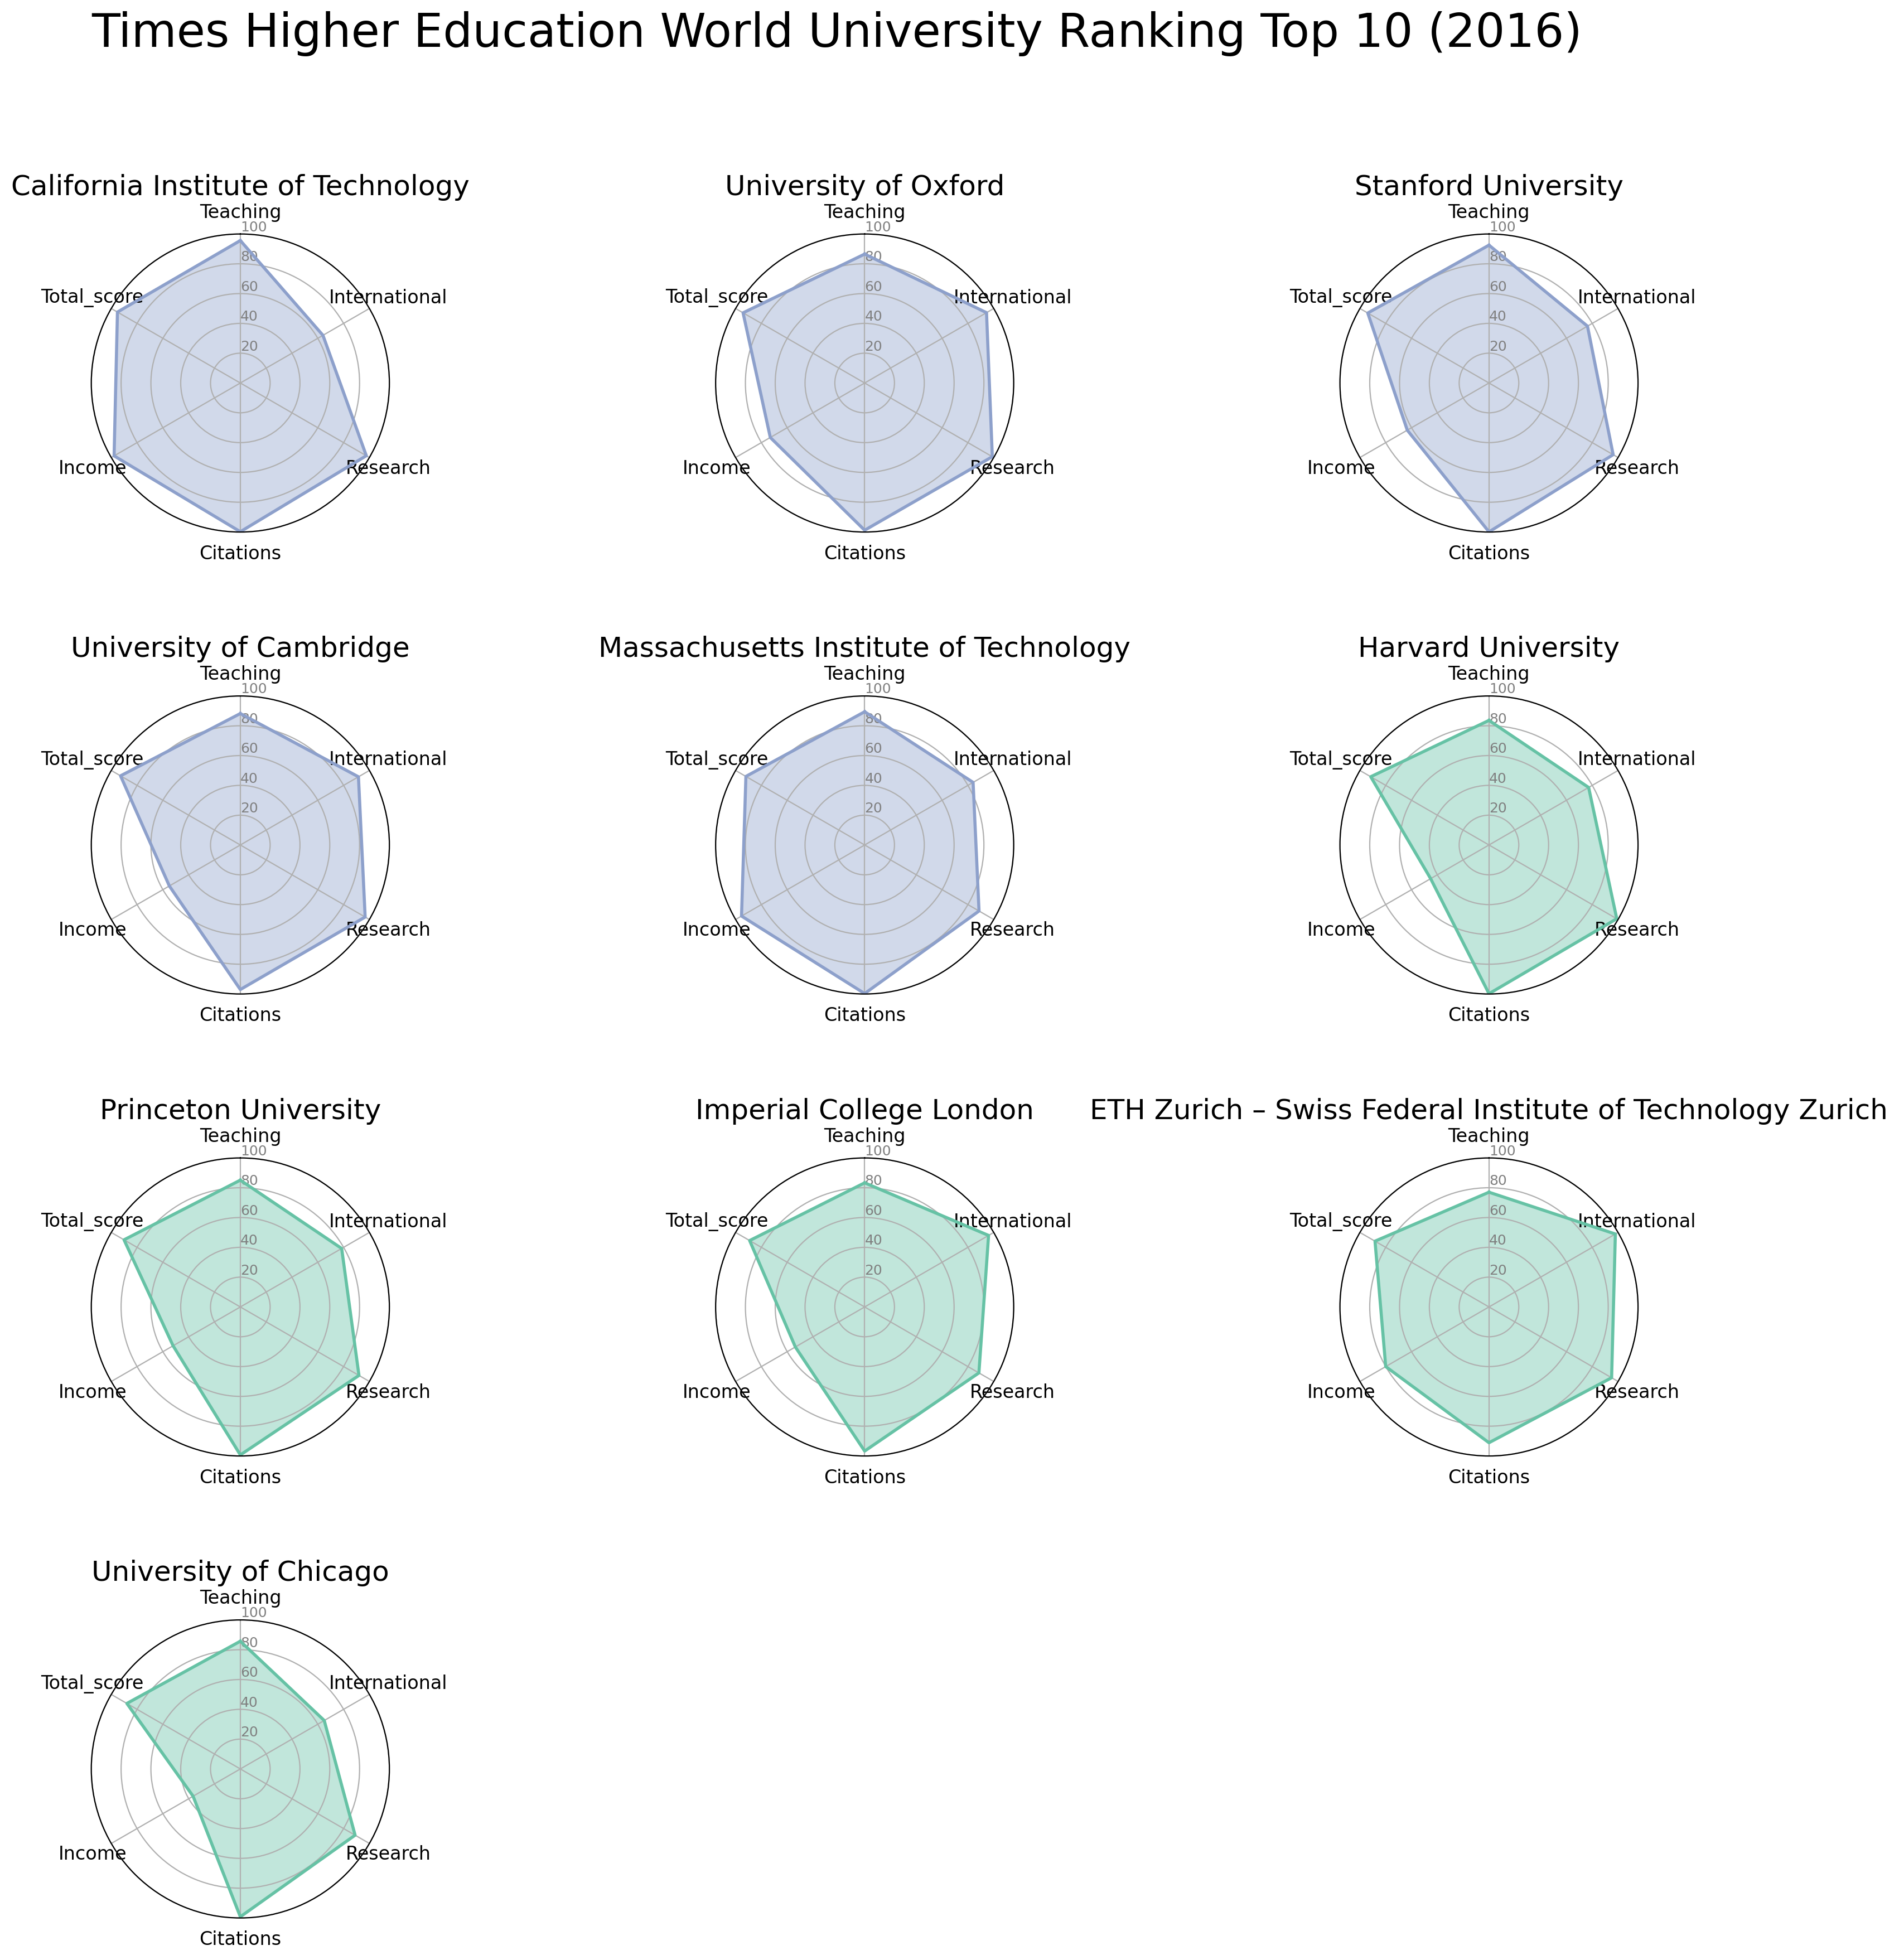

In [59]:
def make_spider(row,title,color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(4,3,row+1, polar=True, )
    

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80,100], ["20","40","60","80","100"], color="grey", size=9)
    plt.ylim(0,100)

    # Ind1
    values=df.loc[row].drop('University_name').values.flatten().tolist()
    values += values[:1]
    values=[float(i) for i in values]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=18, color='black', y=1.1)
    plt.suptitle('Times Higher Education World University Ranking Top 10 (2016)',fontsize=30,x=0.5,y=0.98)
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=200
plt.figure(figsize=(20, 20), dpi=200)
 
# Loop to plot
for row in range(0, len(df.index)):
    plt.subplots_adjust(wspace=0.3,hspace=0.55)
    if row>4:
        make_spider( row=row, title=df['University_name'][row], color=(0.4, 0.7607843137254902, 0.6470588235294118, 1.0))
    else:
        make_spider( row=row, title=df['University_name'][row], color=(0.5529411764705883, 0.6274509803921569, 0.796078431372549, 1.0))

### Treemap

In [66]:
import numpy as np

In [67]:
def treemap(value):
    new=data[data['Year']==value]
    pic=new['Country'].value_counts().head(20).sort_values(ascending = True)
    data3=pic.to_frame()
    data3=data3.reset_index()
    data3 = data3.rename(columns={'Country': 'Number','index':'Country'})
    fig = px.treemap(data3, path=[px.Constant("World(Top 20)"),'Country'], values='Number',
                  color='Number',
                  color_continuous_scale='Teal',
                  color_continuous_midpoint=np.average(data3['Number'], weights=data3['Number']),)
    fig.update_layout(title="Number of Top 200 Universities for Each Country Limitted to TOP 20 Countries",margin = dict(t=50, l=25, r=25, b=25))
    fig.update_traces(hovertemplate = "%{label} <br>Count: %{value}") 
    fig.update_coloraxes(showscale=False)
    return fig

In [68]:
treemap(2012)

### Correlation

In [60]:
def correlationPlot(df,a,b):
    fig = px.scatter(df, x=a, y=b, trendline="ols")
    y = df[a]
    X = df[b]
    X = sm.add_constant(X)
    regression = sm.OLS(y, X)
    model = regression.fit()
    fig.update_layout(plot_bgcolor='rgb(255, 255, 255)',title = f'Correlation between {a} and {b}')
    print(model.summary())
    fig.show()

In [61]:
correlationPlot(dataAll,'Research','Teaching')

                            OLS Regression Results                            
Dep. Variable:               Research   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 1.305e+04
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:33:00   Log-Likelihood:                -9313.8
No. Observations:                2603   AIC:                         1.863e+04
Df Residuals:                    2601   BIC:                         1.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7649      0.402    -14.324      0.0

In [62]:
correlationPlot(dataAll,'Teaching','Citations')

                            OLS Regression Results                            
Dep. Variable:               Teaching   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     885.0
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.20e-167
Time:                        17:33:00   Log-Likelihood:                -10778.
No. Observations:                2603   AIC:                         2.156e+04
Df Residuals:                    2601   BIC:                         2.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3810      0.842     17.084      0.0